# Objective
As you know, this is an advanced course and we assume basic knowledge of ML. 

In your very first checkpoint you'll : 

Import the heart dataset, clean it and perform initial analysis and visualization
Build a  machine learning model
Model test ( Roc curve, Confusion Matrix & test accuracy)

# 1.Preprocessing phase:
Importing the dataset and showing the head of the dataset

In [41]:
import pandas as pd
df=pd.read_csv(r"C:\Users\DELL\Desktop\AI\Deep learning_Level_2\Checkpoint\Checkpoint01\heart.csv", sep = ',')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

# General information about the data columns and values.
Find missing information

In [42]:
type(df)

pandas.core.frame.DataFrame

In [43]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Heatmap
The heatmap permet to show us the relation between parameters, 
Strongthest of the relation between them is discribe by numbers comprise beetween 1 and -1.

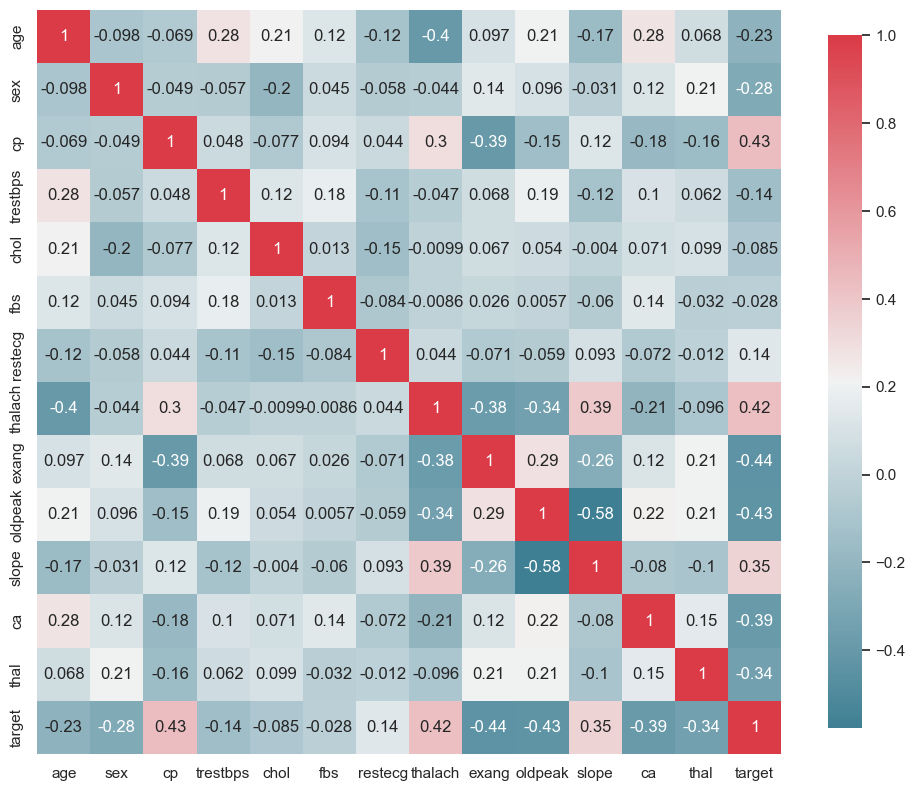

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set_theme()

def plot_correlation_map(df):
    corr=df.corr()
    s,ax=plt.subplots(figsize=(12,10))
    cmap=sns.diverging_palette(220,10,as_cmap=True)
    s=sns.heatmap(corr,cmap=cmap,square=True,cbar_kws={'shrink':.9},ax=ax,annot=True,annot_kws={'fontsize':12})
plot_correlation_map(df)  

In [ ]:
We can conclude that we have a strong relation between Target and slope, thalach & cp.

# Plot pairwise relationships in a dataset

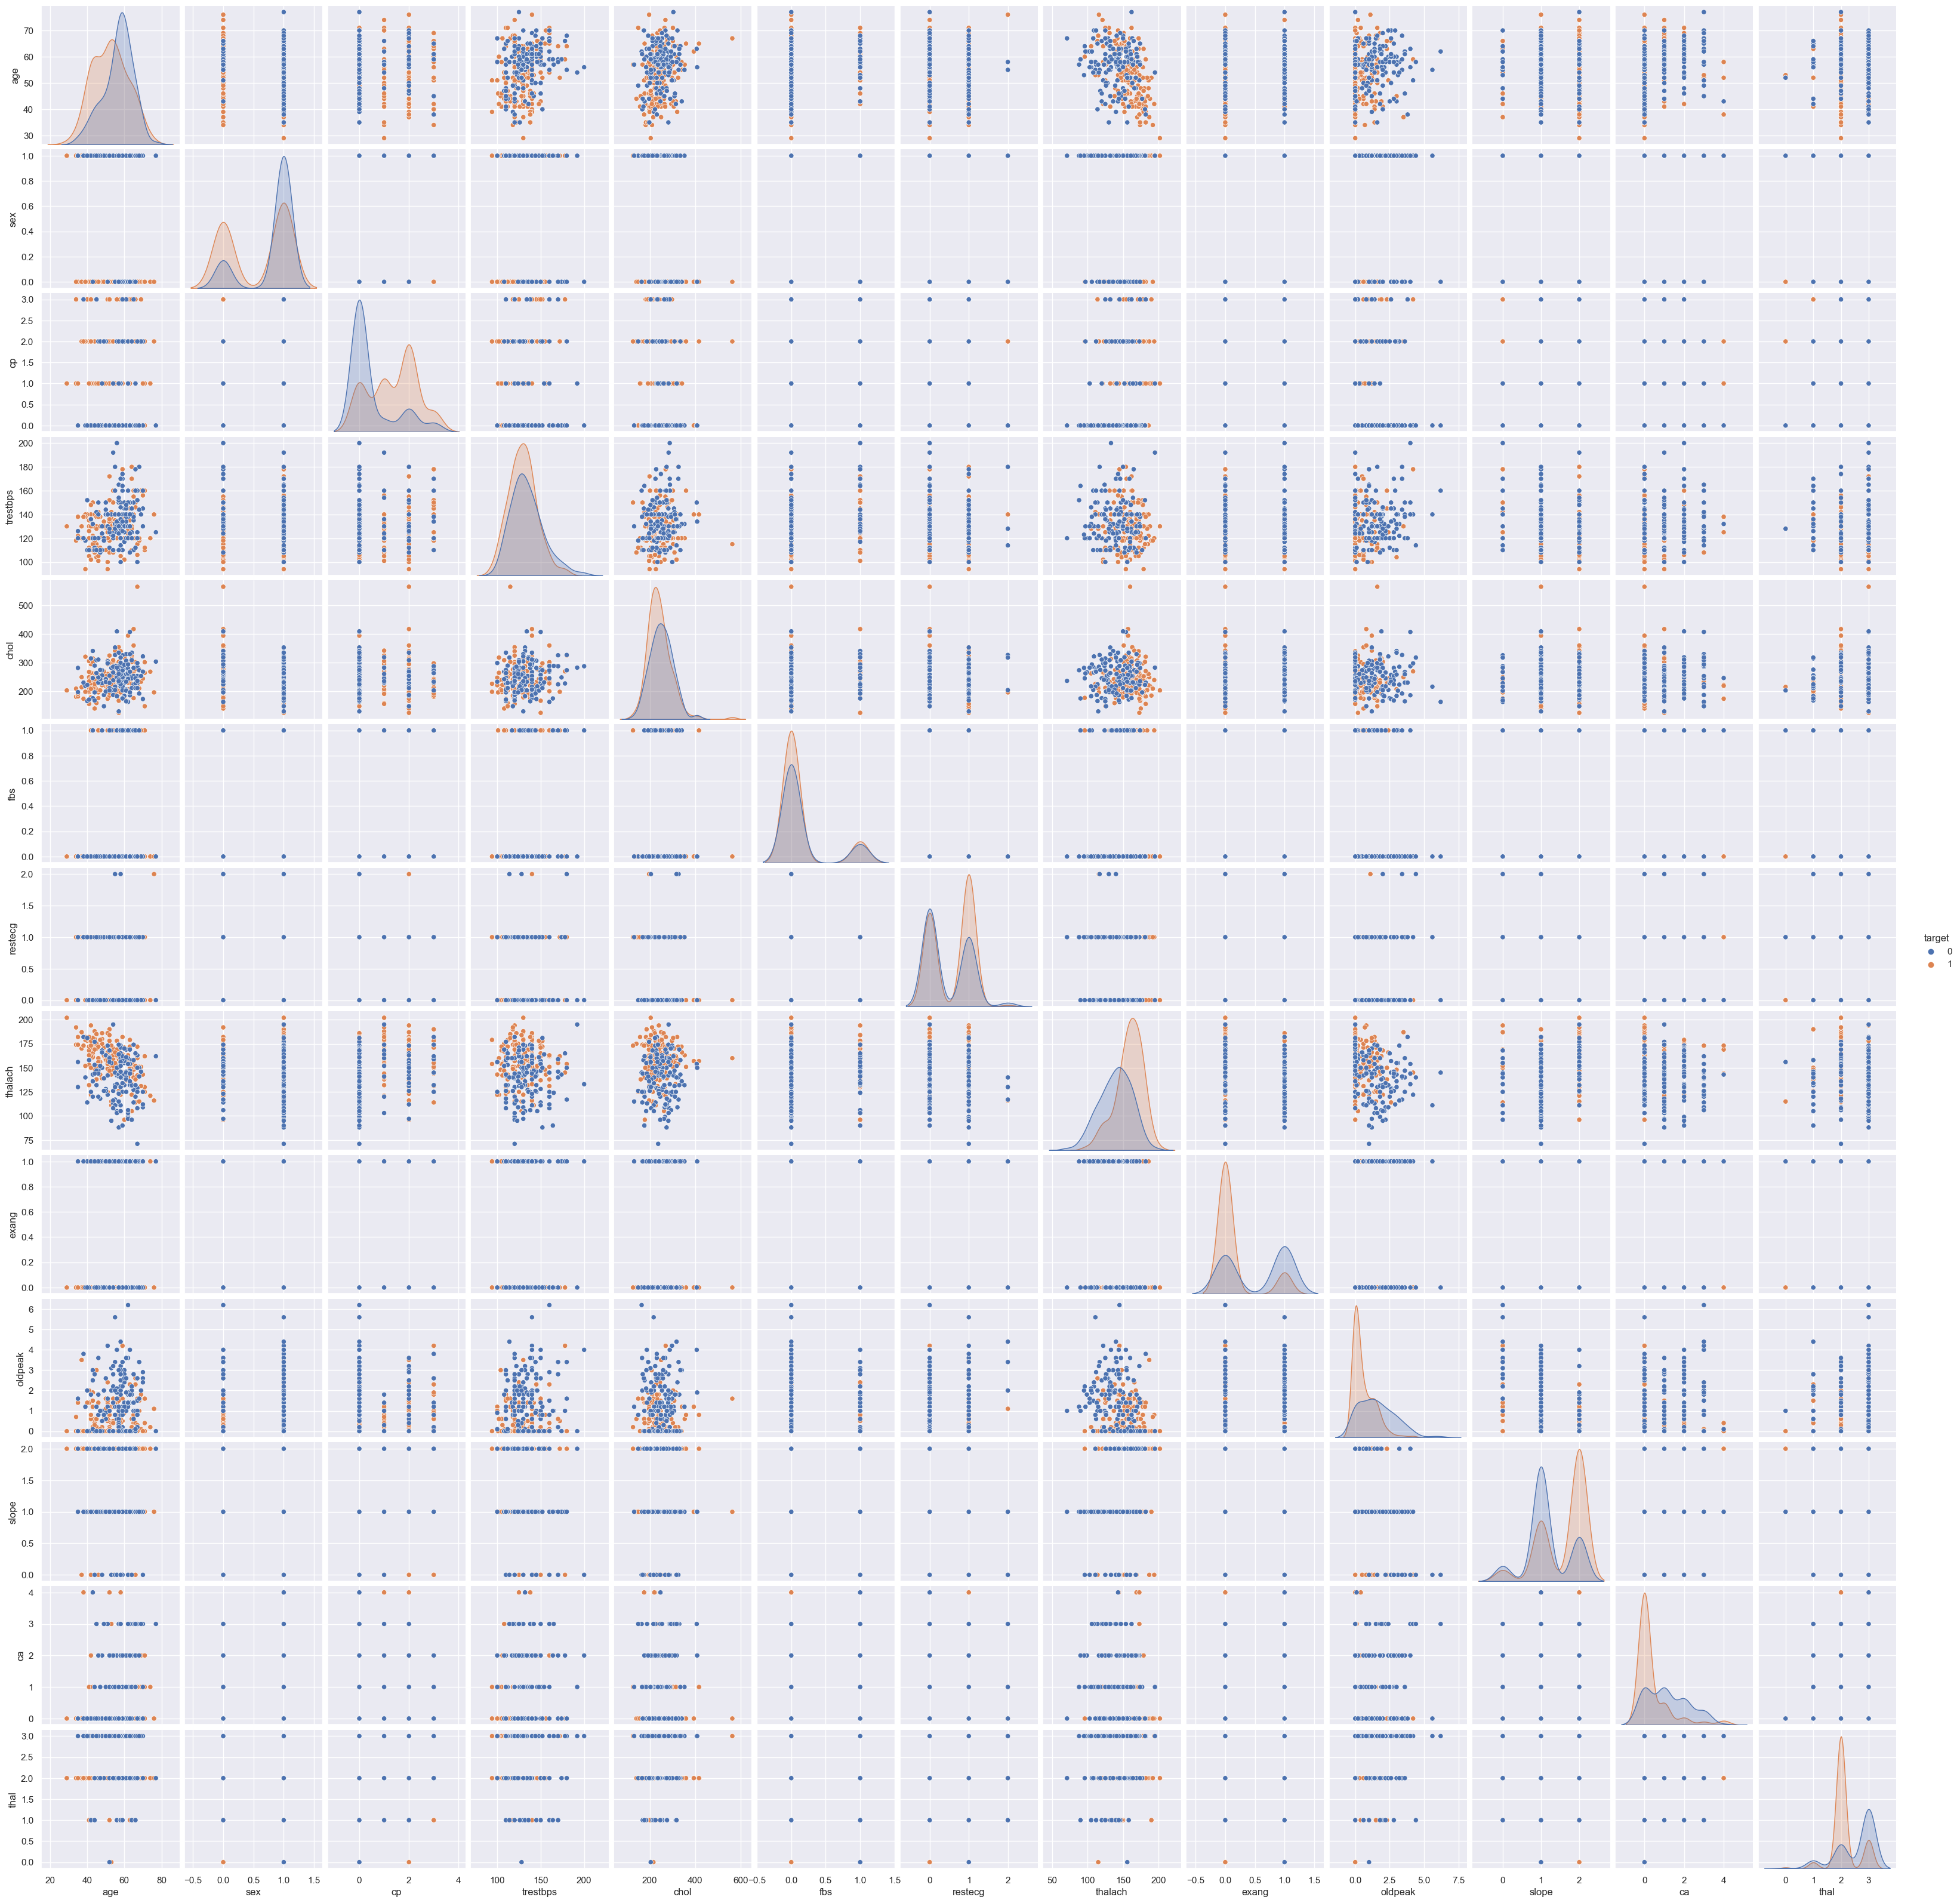

In [45]:
import pandas as pd
import seaborn as sns
sns.pairplot(df,hue="target")

# Drop the useless columns.

In [46]:
# Stock Removed column name 'A' in Title
df.drop(['age','sex','trestbps','chol','fbs','restecg','exang','oldpeak','thal'], axis=1, inplace=True)
df

cp  thalach  slope  ca  target
0     3      150      0   0       1
1     2      187      0   0       1
2     1      172      2   0       1
3     1      178      2   0       1
4     0      163      2   0       1
..   ..      ...    ...  ..     ...
298   0      123      1   0       0
299   3      132      1   0       0
300   0      141      1   2       0
301   0      115      1   1       0
302   1      174      1   1       0

[303 rows x 5 columns]

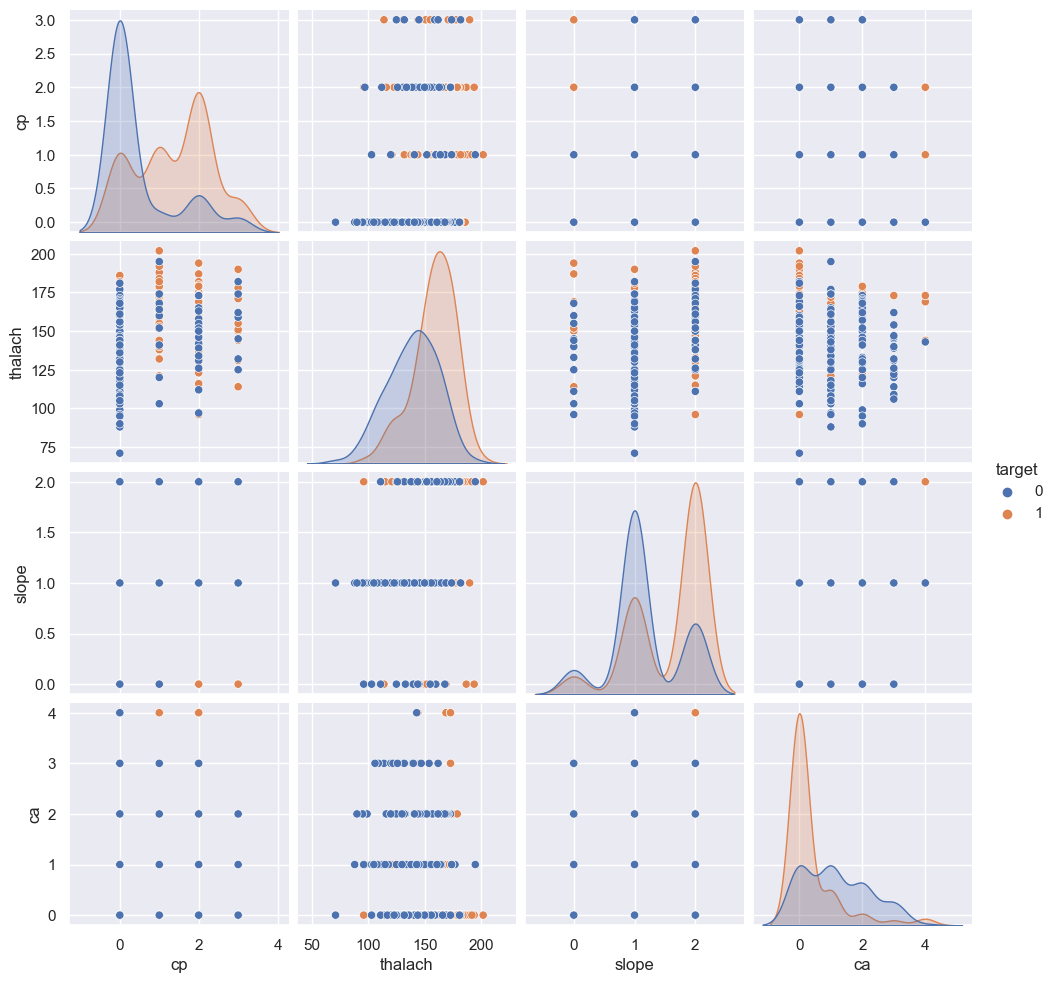

In [47]:
import pandas as pd
import seaborn as sns
sns.pairplot(df,hue="target")

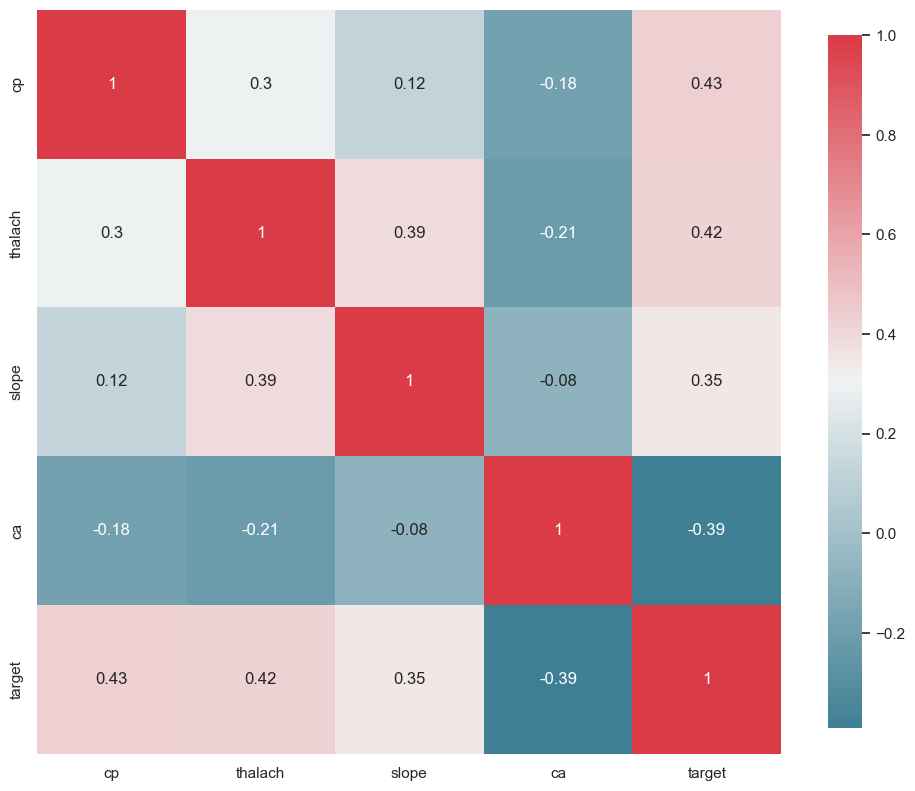

In [48]:

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set_theme()

def plot_correlation_map(df):
    corr=df.corr()
    s,ax=plt.subplots(figsize=(12,10))
    cmap=sns.diverging_palette(220,10,as_cmap=True)
    s=sns.heatmap(corr,cmap=cmap,square=True,cbar_kws={'shrink':.9},ax=ax,annot=True,annot_kws={'fontsize':12})
plot_correlation_map(df)    

# Logistic Regression Code

In [53]:
#import relevant libraries
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 

#features extraction 

#extract x and y from our data 

x=df.drop(columns=['target']).values

y=df["target"].values


x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.80,random_state=0) #splitting data with test size of 80 % 
logreg = LogisticRegression() #build our logistic model 
logreg.fit(x_train,y_train) #fitting training data 
y_pred = logreg.predict(x_test) #testing model’s performance 
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test))) 


Accuracy=0.79


# Confusion Matrix

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

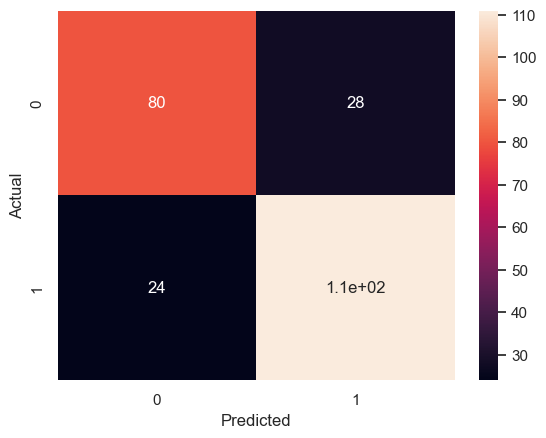

In [63]:

import pandas as pd
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']) 
sns.heatmap(confusion_matrix, annot=True) 

# Classification report

In [64]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       108
           1       0.80      0.82      0.81       135

    accuracy                           0.79       243
   macro avg       0.78      0.78      0.78       243
weighted avg       0.79      0.79      0.79       243



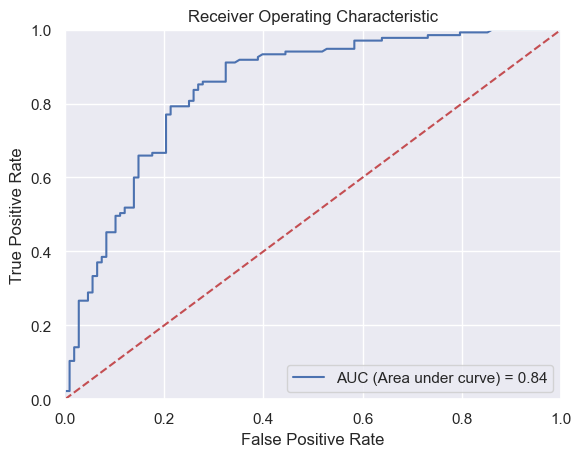

In [65]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC (Area under curve) = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# KNN (K-Nearest Neighbors)

In [67]:
#import the relevant libraries 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score

#Choosing the features as x and the target as y 
x=df[['cp','thalach','slope','ca']] 
y=df['target'] 

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.8,random_state=30) #split our data with test size of 80% 
knn=KNeighborsClassifier(n_neighbors=20)  #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier 
y_pred=knn.predict(x_test) #Testing 
print('Accuracy=',accuracy_score(y_pred,y_test)) 

from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred)) 


Accuracy= 0.6995884773662552
              precision    recall  f1-score   support

           0       0.65      0.73      0.69       111
           1       0.75      0.67      0.71       132

    accuracy                           0.70       243
   macro avg       0.70      0.70      0.70       243
weighted avg       0.70      0.70      0.70       243



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


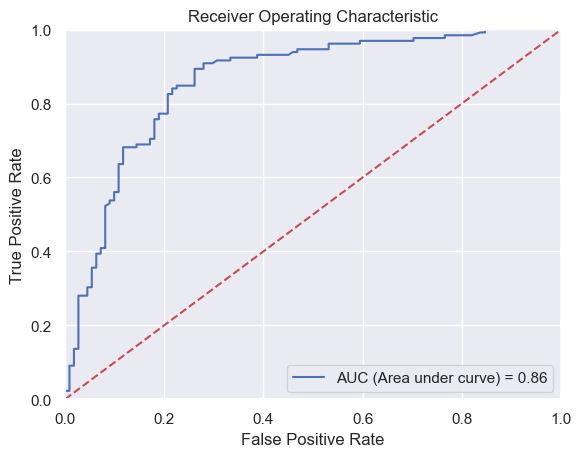

In [68]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC (Area under curve) = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Confusion Matrix

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

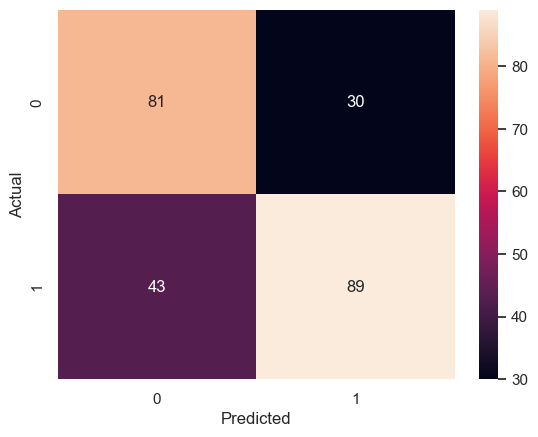

In [19]:
import pandas as pd
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']) 
sns.heatmap(confusion_matrix, annot=True) 

In [124]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X)
#The labels_ property returns an array of integers where the values correspond to the distinct categories.
labels = model.labels_

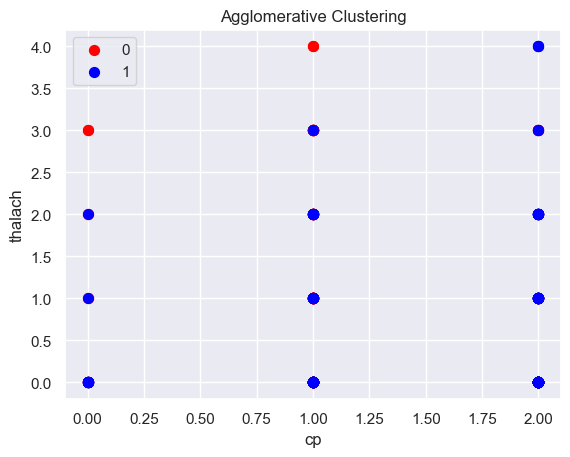

In [126]:
plt.scatter(X[labels==0, 2], X[labels==0, 3], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 2], X[labels==1, 3], s=50, marker='o', color='blue')

plt.title('Agglomerative Clustering')
plt.xlabel('cp')
plt.ylabel('thalach')
plt.legend('01')
plt.show()

# Decision Trees

score:0.7377049180327869


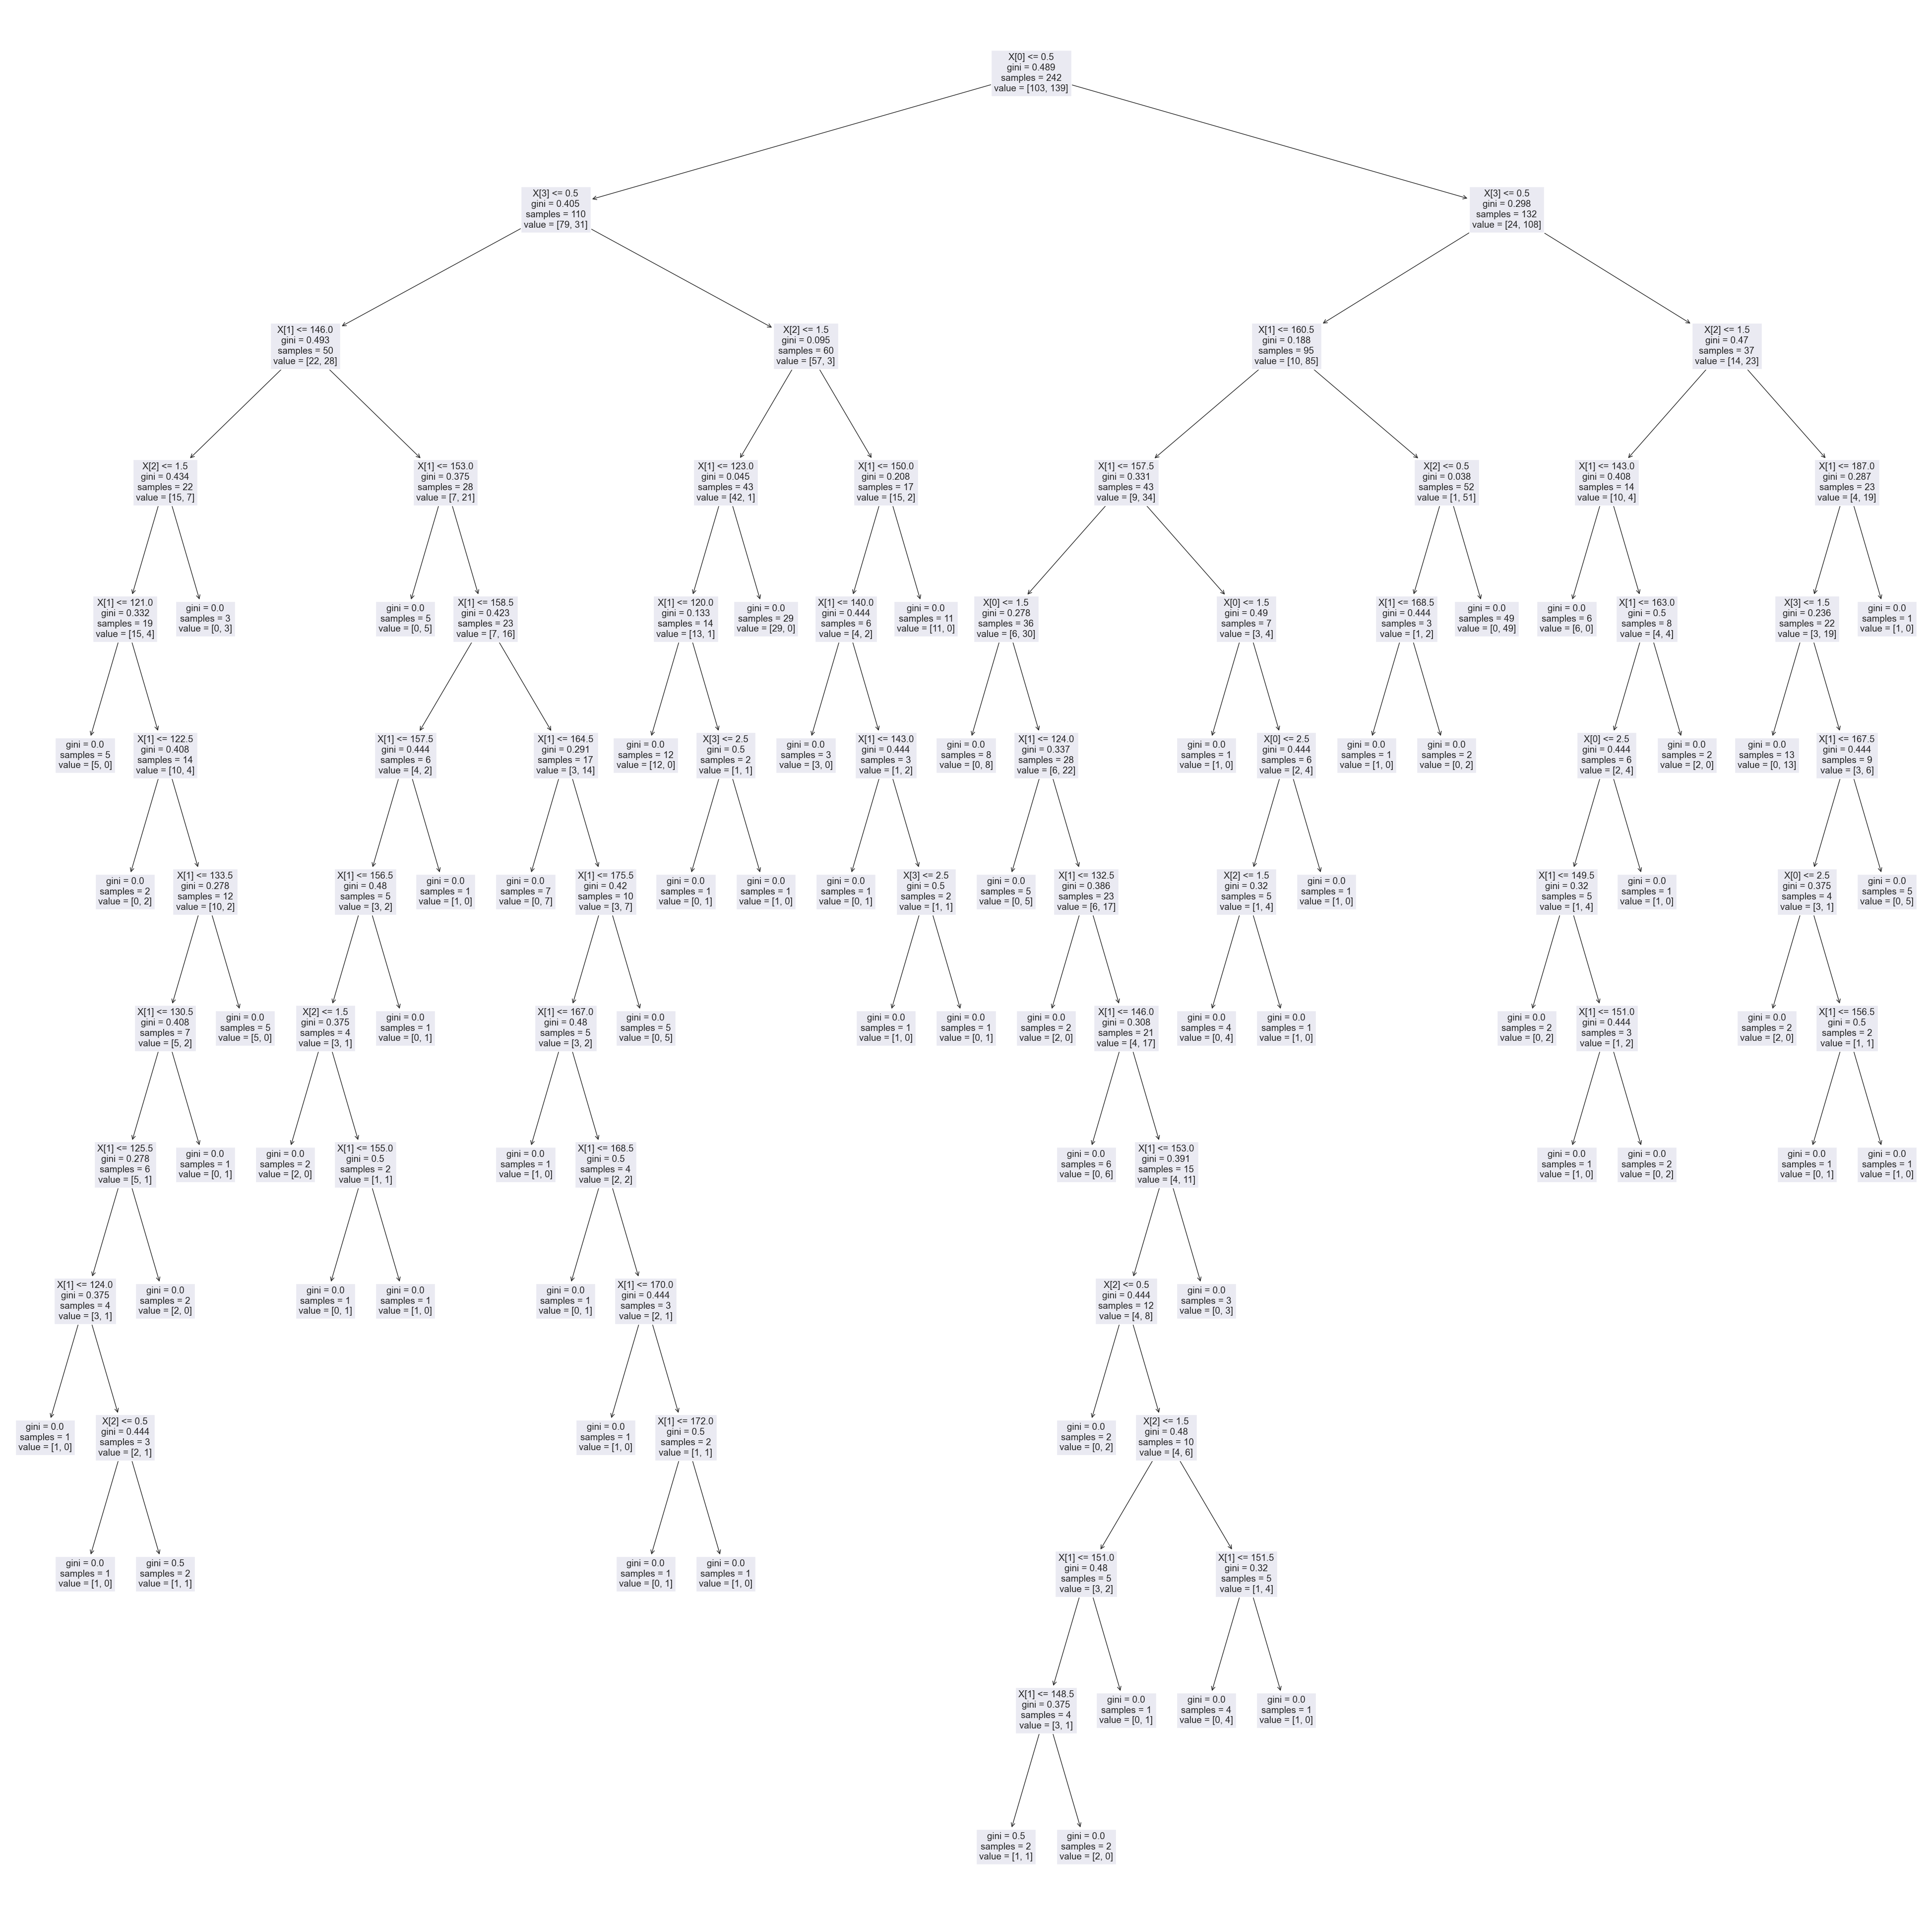

In [112]:
#conda install python-graphviz
#pip install graphviz

#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
# import graphviz 
# from graphviz import Source
import matplotlib.pyplot as plt


#features extraction
#x=data.drop(["Survived", "Name", "Cabin", "Ticket", "Embarked"], axis=1) 
#y= data["Survived"] 
#splitting data 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10) 
#applying tree algorithm 
modl = tree.DecisionTreeClassifier() 
modl.fit(x_train, y_train) #fitting our model
y_pred=modl.predict(x_test) # evaluating our model 
print("score:{}".format(accuracy_score(y_test, y_pred))) 



text_representation = tree.export_text(modl)
# print(text_representation)

with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)


fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(modl)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

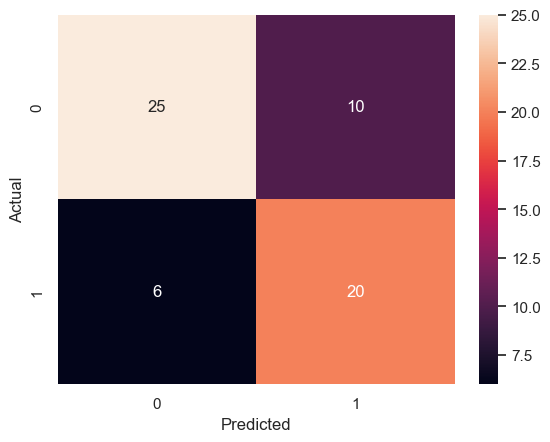

In [113]:
import pandas as pd
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']) 
sns.heatmap(confusion_matrix, annot=True) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


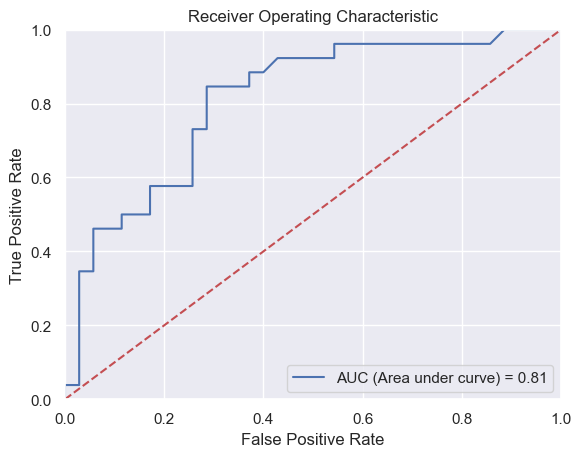

In [88]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC (Area under curve) = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Random forest

Accuracy: 0.7377049180327869


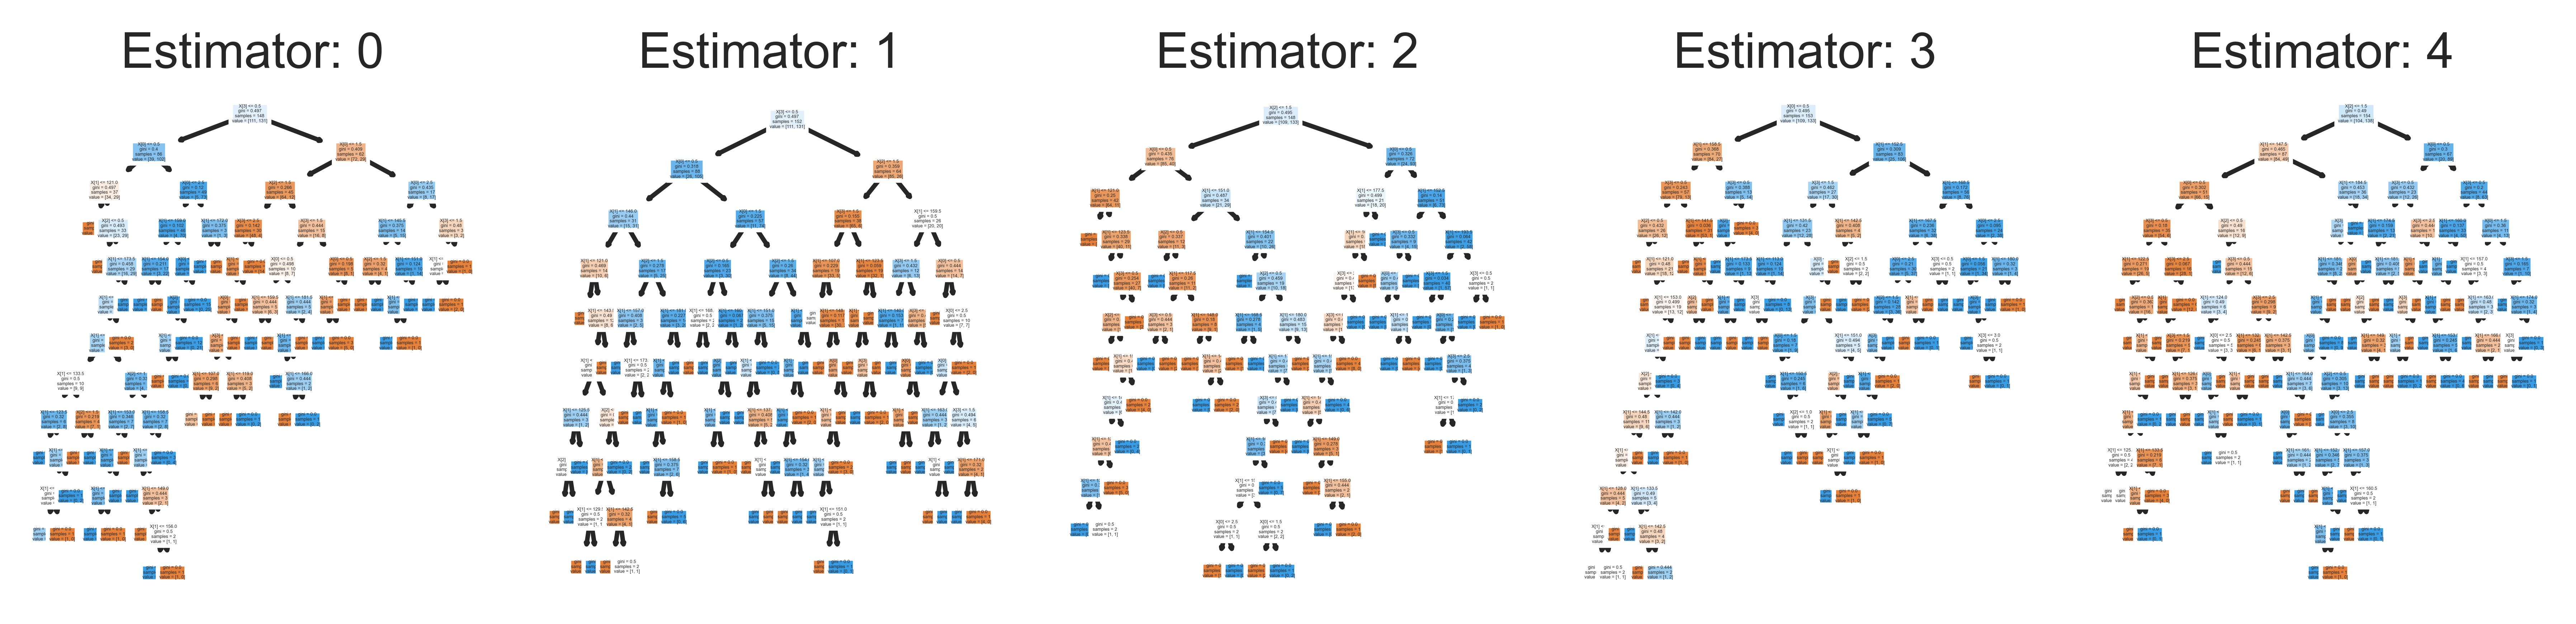

In [89]:
# Random Forest Code
from sklearn import datasets 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier 
from sklearn import metrics # Importing metrics to test accuracy 



x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.20) #splitting data with test size of 20% 

# Random Forest Prediction

clf=RandomForestClassifier(n_estimators=5) #Creating a random forest with 100 decision trees 
clf.fit(x_train, y_train) #Training our model 
y_pred=clf.predict(x_test) #testing our model 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) #Measuring the accuracy of our model 

# This may not the best way to view each estimator as it is small
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(clf.estimators_[index],
                   filled = True,
                   ax = axes[index]);
    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('rf_5trees.png')

In [91]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       0.72      0.72      0.72        29
           1       0.75      0.75      0.75        32

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

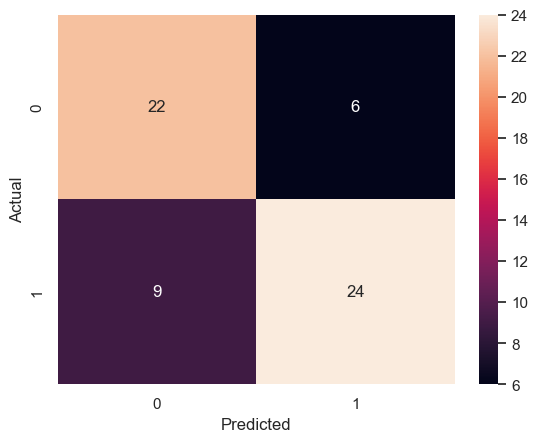

In [25]:
import pandas as pd
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted']) 
sns.heatmap(confusion_matrix, annot=True) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


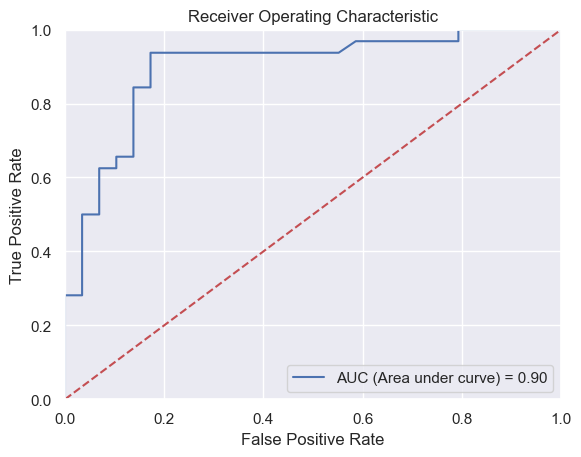

In [90]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = logreg.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC (Area under curve) = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Unsupervised Machine Learning

# Hierarchical clustering

In [114]:


#we are gonne use only this data in order to show the clusters
X = x.iloc[:, :].values


# number of clusters = 2 ( target)
from sklearn.cluster import AgglomerativeClustering



model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X)
#The labels_ property returns an array of integers where the values correspond to the distinct categories.
labels = model.labels_


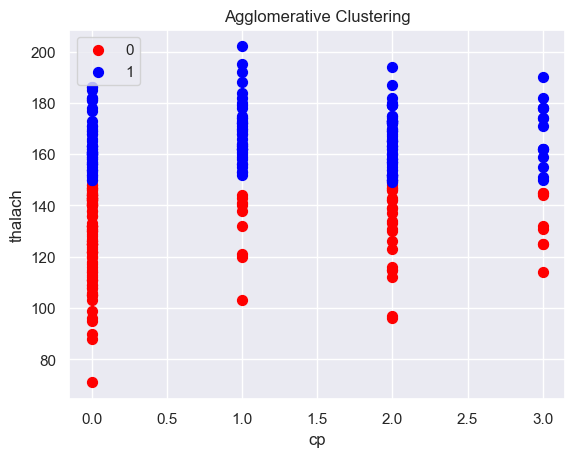

In [115]:
#Plot the clusters 
plt.scatter(X[labels==0, 0], X[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 0], X[labels==1, 1], s=50, marker='o', color='blue')


plt.title('Agglomerative Clustering')
plt.xlabel('cp')
plt.ylabel('thalach')
plt.legend('01')
plt.show()



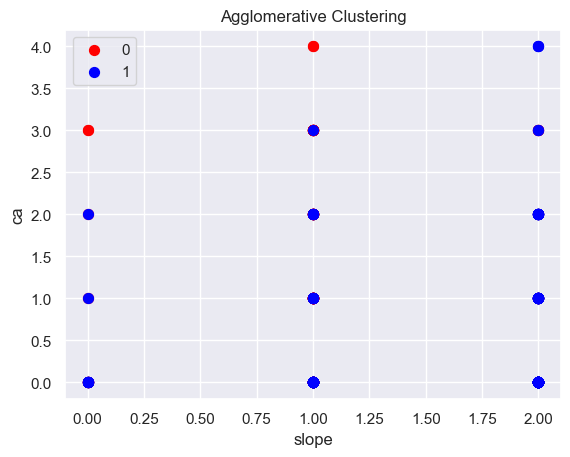

In [97]:
#Plot the clusters 
plt.scatter(X[labels==0, 2], X[labels==0, 3], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 2], X[labels==1, 3], s=50, marker='o', color='blue')


plt.title('Agglomerative Clustering')
plt.xlabel('slope')
plt.ylabel('ca')
plt.legend('01')
plt.show()


# K-means

In [116]:
model = KMeans(n_clusters=2)
model.fit(X)
#The labels_ property returns an array of integers where the values correspond to the distinct categories.
labels = model.labels_

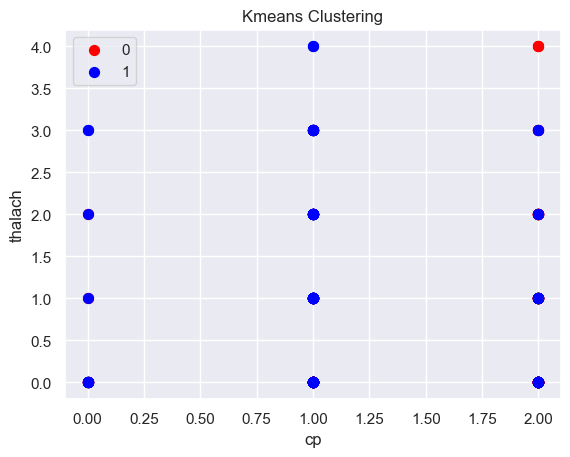

In [117]:
# Plot the clusters.
plt.scatter(X[labels==0, 2], X[labels==0, 3], s=50, marker='o', color='red')
plt.scatter(X[labels==1, 2], X[labels==1, 3], s=50, marker='o', color='blue')

plt.title('Kmeans Clustering')
plt.xlabel('cp')
plt.ylabel('thalach')
plt.legend('01')
plt.show()

# K-means Centroids

In [123]:
kmeans.predict(df)
print(kmeans.cluster_centers_)    #Printing the coordinates of cluster centers. If we have chosen k = n so we will have 5 centers

[[  0.58474576 126.20338983   1.12711864   0.98305085   0.29661017]
 [  1.21081081 164.6          1.57297297   0.56756757   0.7027027 ]]
